In [1]:
import numpy as np
import itertools 
import ezc3d
import matplotlib.pyplot as plt
from pathlib import Path
from math import sqrt
from tqdm import tqdm

# Wyświetlenie surowych danych EMG z pliku C3D

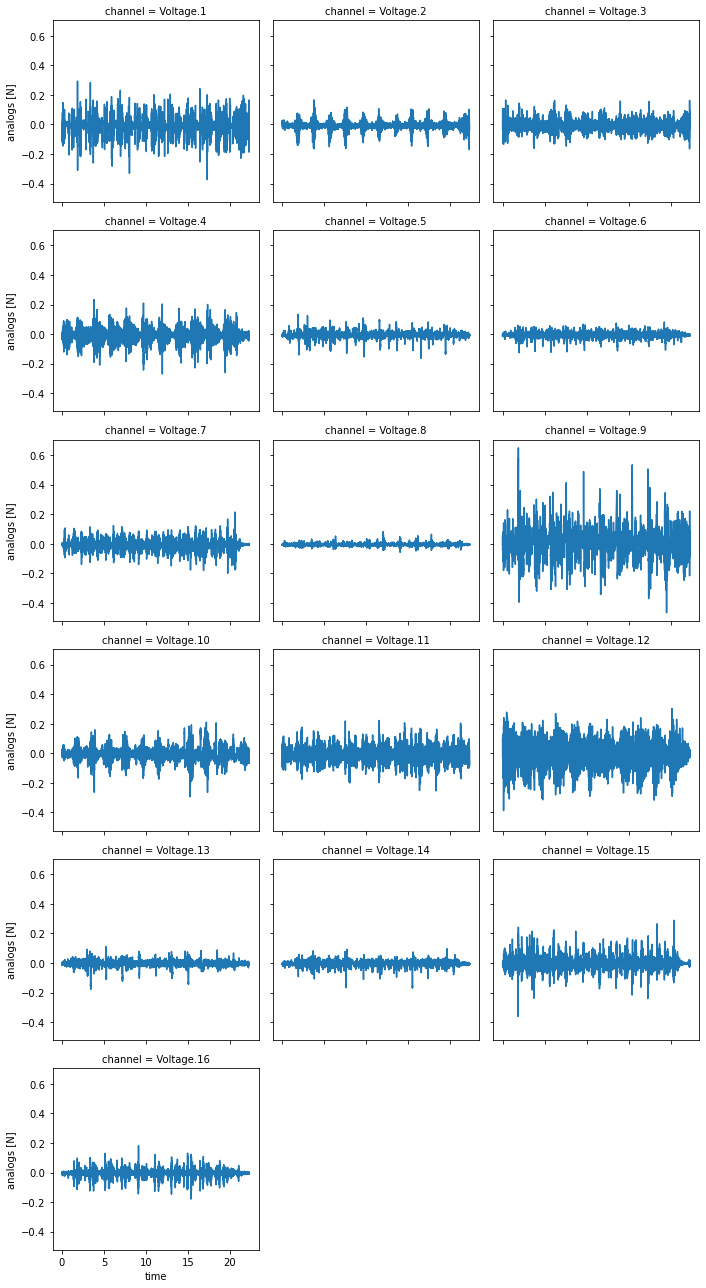

In [2]:
from pyomeca import Analogs

data_path = r"C:\Users\gmultimedia.PJATK8\Desktop\PJATK_K\2020-08-10-B0450-S01-E01-T02.c3d"
muscles = ["Voltage.1","Voltage.2","Voltage.3","Voltage.4","Voltage.5","Voltage.6","Voltage.7","Voltage.8","Voltage.9","Voltage.10","Voltage.11","Voltage.12","Voltage.13","Voltage.14","Voltage.15","Voltage.16"]
muscles_names = ["Czworoboczny grzbietu L","Trójgłowy ramienia L", "Dwugłowy ramienia L", "Prostownik nadgarstka L","Skośny brzucha L", "Pośladkowy średni L","Czworogłowy uda L", "Brzuchaty łydki L","Czworoboczny grzbietu P","Trójgłowy ramienia P", "Dwugłowy ramienia P", "Prostownik nadgarstka P","Skośny brzucha P", "Pośladkowy średni P","Czworogłowy uda P", "Brzuchaty łydki P"]


emg = Analogs.from_c3d(data_path, usecols=muscles)
emg.plot(x="time", col="channel", col_wrap=3)

# Obróbka danych EMG

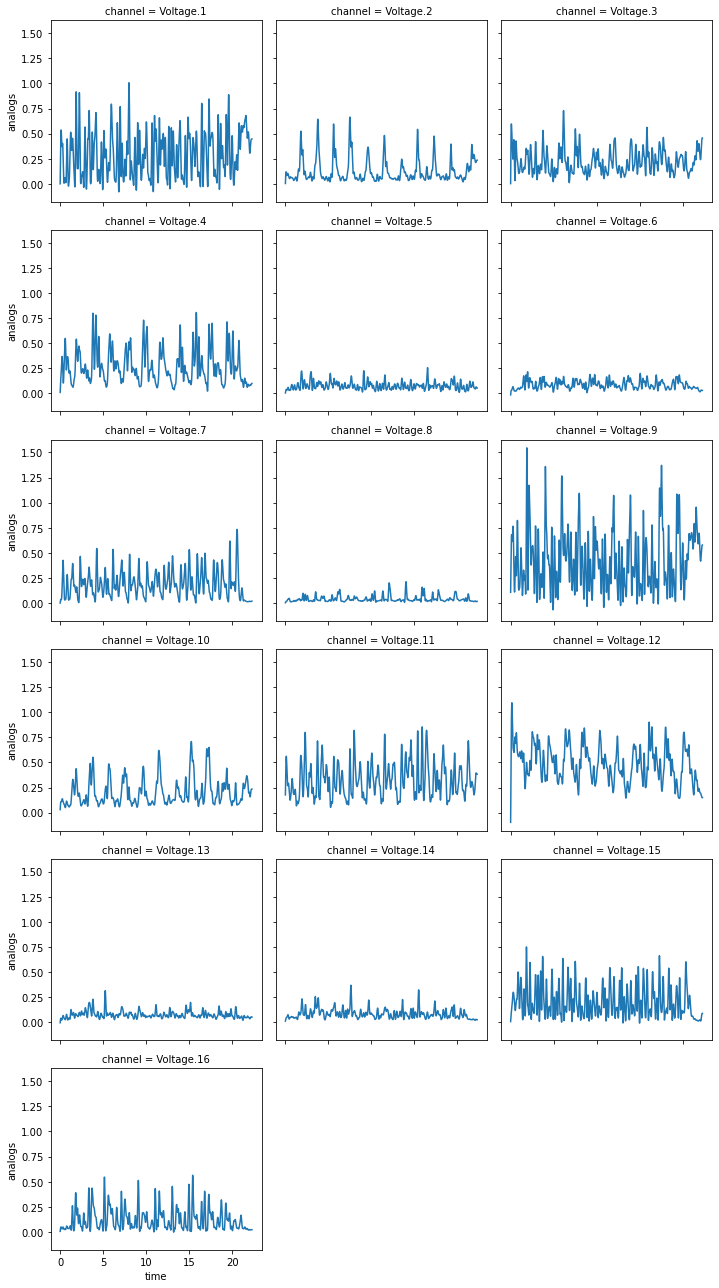

In [3]:
emg_processed = (
    emg.meca.band_pass(order=2, cutoff=[10, 425])
    .meca.center()
    .meca.abs()
    .meca.low_pass(order=4, cutoff=5, freq=emg.rate)
    .meca.normalize(8)
)

emg_processed.plot(x="time", col="channel", col_wrap=3)

# Wyświetlenie danych z nazwami mięśni

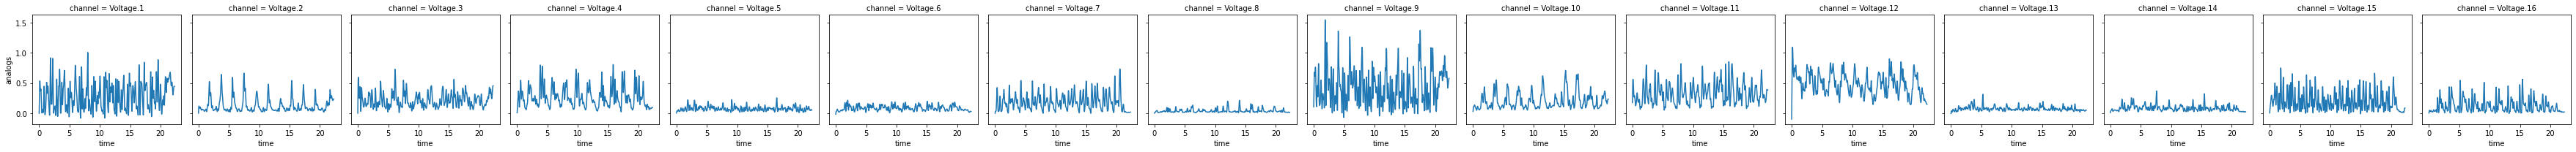

In [4]:
emg_processed.plot(col="channel")

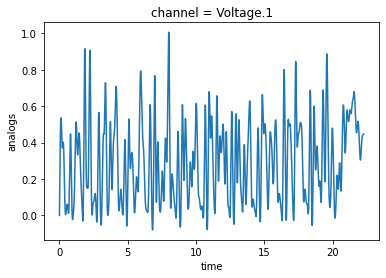

In [5]:
emg_processed[0].plot()

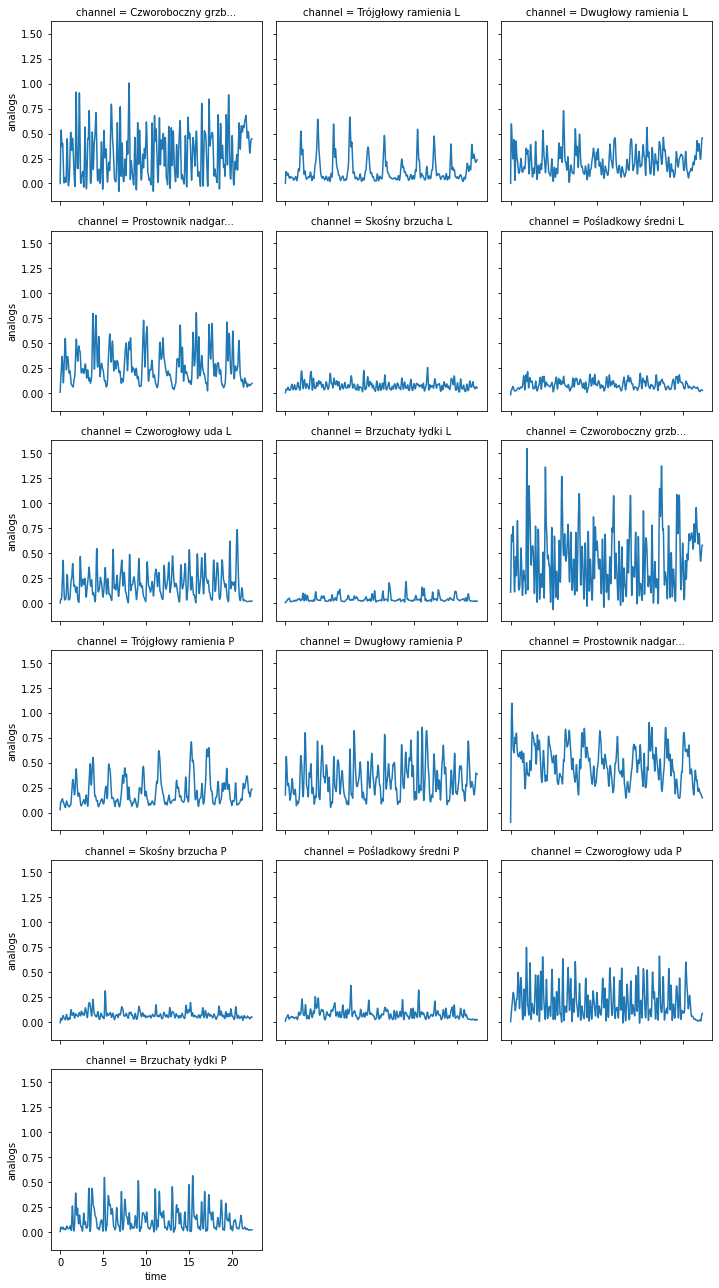

In [6]:
emg_processed.indexes
emg_processed['channel'] = muscles_names
emg_processed.plot(x="time", col="channel", col_wrap=3)

In [7]:
from scipy import stats

In [8]:
emg_2 = stats.zscore(emg_processed[0])

# Wykresy wczytywane pojedyńczo

(1, 22285)


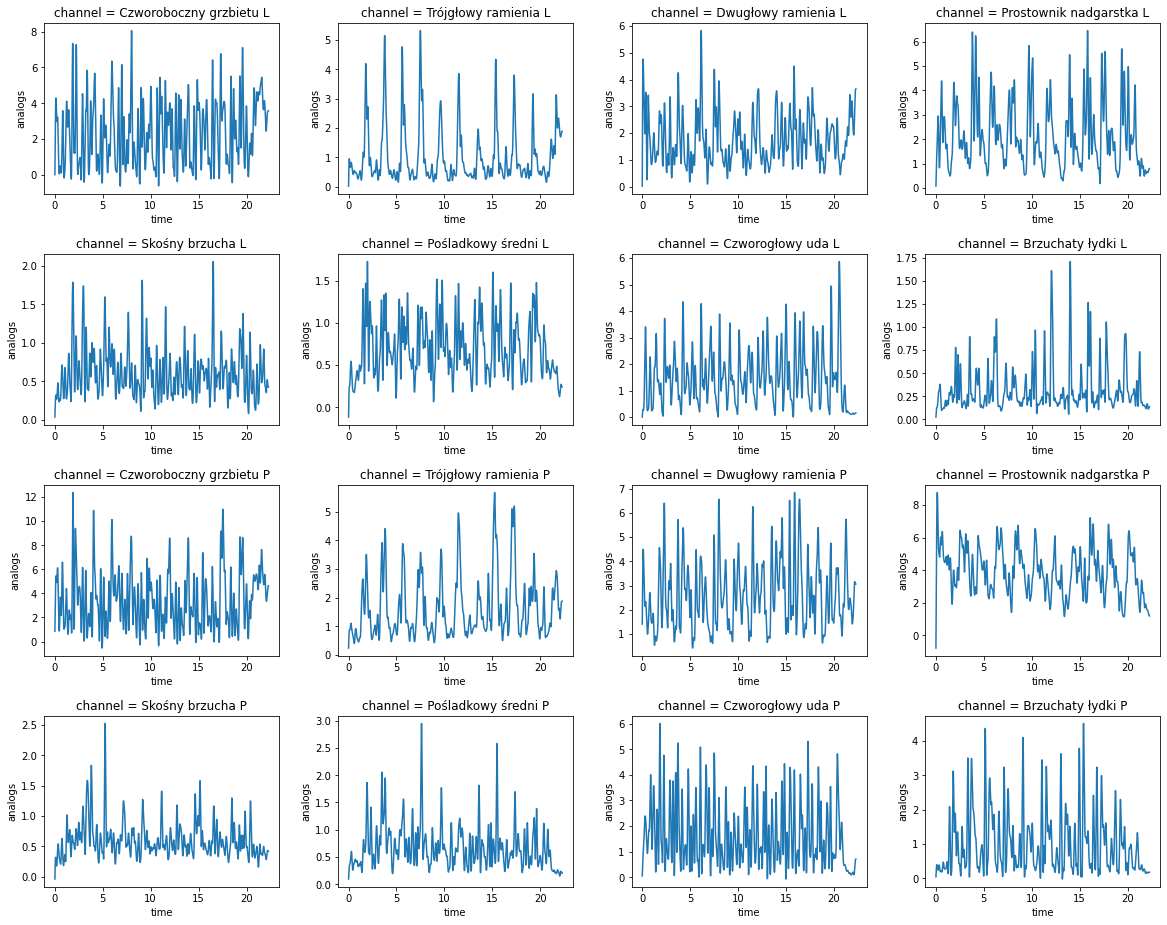

In [13]:
from matplotlib.pyplot import subplot
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

from sklearn import preprocessing
import numpy as np

from matplotlib import scale as mscale



muscles = [["Voltage.1"],["Voltage.2"],["Voltage.3"],["Voltage.4"],["Voltage.5"],["Voltage.6"],["Voltage.7"],["Voltage.8"],["Voltage.9"],["Voltage.10"],["Voltage.11"],["Voltage.12"],["Voltage.13"],["Voltage.14"],["Voltage.15"],["Voltage.16"]]
muscles_names = [["Czworoboczny grzbietu L"],["Trójgłowy ramienia L"], ["Dwugłowy ramienia L"], ["Prostownik nadgarstka L"],["Skośny brzucha L"], ["Pośladkowy średni L"],["Czworogłowy uda L"], ["Brzuchaty łydki L"],["Czworoboczny grzbietu P"],["Trójgłowy ramienia P"], ["Dwugłowy ramienia P"], ["Prostownik nadgarstka P"],["Skośny brzucha P"], ["Pośladkowy średni P"],["Czworogłowy uda P"], ["Brzuchaty łydki P"]]



#print(muscles[0])
emg_list=[]

plt.figure(figsize=(20,15))

for i in range(0,16): 
    emg_list.append(Analogs.from_c3d(data_path, usecols=muscles[i]))
    
    emg_p = (
    emg_list[i].meca.band_pass(order=2, cutoff=[10, 425])
    .meca.center()
    .meca.abs()
    .meca.low_pass(order=4, cutoff=5, freq=emg.rate)
    .meca.normalize(1)
    )
    
    #print(emg_p.indexes)
    emg_p['channel'] = muscles_names[i]
    subplot(4, 4, i+1)
    emg_p.plot(x="time")

    
    #plt.show()
    
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.35)

print(emg_p.shape)
#print(emg_p[1])
#normalized = preprocessing.normalize(a)

In [ ]:
import sys

print(emg_p)
print(emg_p[0][0])
print(emg_p.shape[1])

maxi=0
for i in range(emg_p.shape[1]):
    if emg_p[0][i]>maxi:
        maxi=emg_p[0][i]
        
print(maxi)





In [ ]:
max(emg_p)

In [ ]:
emg_p[0].shape()

In [ ]:
import numpy as np
lenM = np.shape(emg_p[0])

In [ ]:
print(lenM)

In [ ]:
print(emg_p[0]['analogs'])

In [ ]:
for frame in lenM:
    print(emg_p[0][frame])

In [ ]:
print(emg_p[0][0].values)

In [ ]:
print(emg_p[0][0].values)
print(emg_p[0][1].values)
print(emg_p[0][2].values)

# Normalizacja wyników

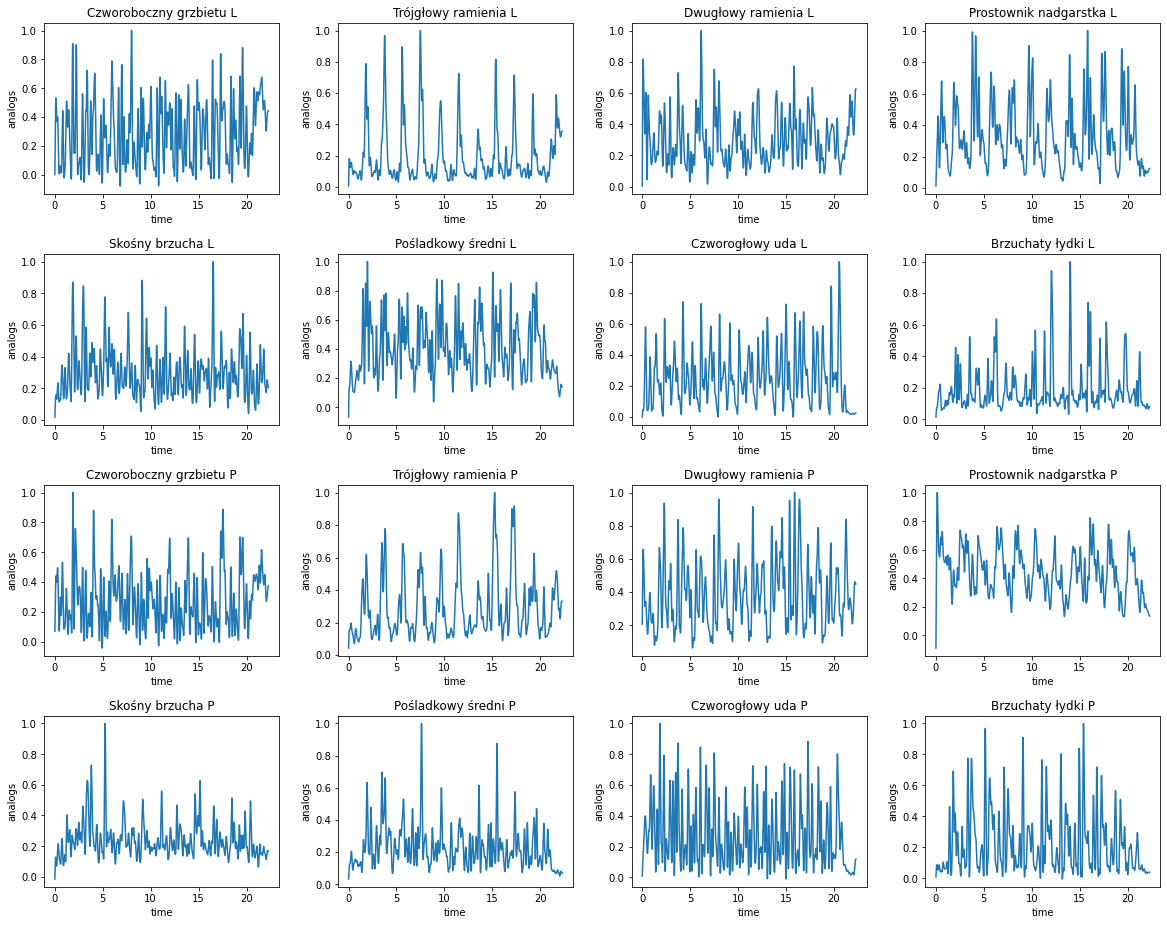

In [99]:
import sys
from matplotlib.pyplot import subplot
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
from matplotlib import scale as mscale



muscles = [["Voltage.1"],["Voltage.2"],["Voltage.3"],["Voltage.4"],["Voltage.5"],["Voltage.6"],["Voltage.7"],["Voltage.8"],["Voltage.9"],["Voltage.10"],["Voltage.11"],["Voltage.12"],["Voltage.13"],["Voltage.14"],["Voltage.15"],["Voltage.16"]]
muscles_names = [["Czworoboczny grzbietu L"],["Trójgłowy ramienia L"], ["Dwugłowy ramienia L"], ["Prostownik nadgarstka L"],["Skośny brzucha L"], ["Pośladkowy średni L"],["Czworogłowy uda L"], ["Brzuchaty łydki L"],["Czworoboczny grzbietu P"],["Trójgłowy ramienia P"], ["Dwugłowy ramienia P"], ["Prostownik nadgarstka P"],["Skośny brzucha P"], ["Pośladkowy średni P"],["Czworogłowy uda P"], ["Brzuchaty łydki P"]]
muscles_names2 = ["Czworoboczny grzbietu L","Trójgłowy ramienia L", "Dwugłowy ramienia L", "Prostownik nadgarstka L","Skośny brzucha L", "Pośladkowy średni L","Czworogłowy uda L", "Brzuchaty łydki L","Czworoboczny grzbietu P","Trójgłowy ramienia P", "Dwugłowy ramienia P", "Prostownik nadgarstka P","Skośny brzucha P", "Pośladkowy średni P","Czworogłowy uda P", "Brzuchaty łydki P"]

max_val=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

emg_list=[]

emg_processed=[[]]

plt.figure(figsize=(20,15))


for i in range(0,16): 
    #emg_processed.append(muscles_names2[i])
    emg_processed.append([])
    
    emg_norm_value=[]
    emg_list.append(Analogs.from_c3d(data_path, usecols=muscles[i]))
    
    emg_p = (
    emg_list[i].meca.band_pass(order=2, cutoff=[10, 425])
    .meca.center()
    .meca.abs()
    .meca.low_pass(order=4, cutoff=5, freq=emg.rate)
    .meca.normalize(1)
    )
    emg_p['channel'] = muscles_names[i]
    subplot(4, 4, i+1)
    for j in range(emg_p.shape[1]):
        if emg_p[0][j].values>max_val[i]:
            max_val[i]=emg_p[0][j].values
    for k in range(emg_p.shape[1]):
        emg_norm_value.append(emg_p[0][k].values/max_val[i])
        #emg_processed.append([muscles_names2[i],emg_p.time.values[k],emg_norm_value[k]])
    #emg_norm=[emg_p.time.values,emg_norm_value]
    
    
        emg_processed[i].append([emg_p.time.values[k],emg_norm_value[k]])
    
    plt.plot(emg_p.time.values,emg_norm_value)
    plt.xlabel("time")
    plt.ylabel("analogs");
    plt.title(muscles_names2[i])
    
    #plt.show()
    
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.35)








In [34]:
print(emg_p)
print(emg_p.time.values)



<xarray.DataArray 'analogs' (channel: 1, time: 22285)>
array([[0.04153706, 0.04779077, 0.05404946, ..., 0.17747151, 0.17747152,
        0.17747152]])
Coordinates:
  * channel  (channel) <U17 'Brzuchaty łydki P'
  * time     (time) float64 0.0 0.001 0.002 0.003 ... 22.28 22.28 22.28 22.28
[0.0000e+00 1.0000e-03 2.0000e-03 ... 2.2282e+01 2.2283e+01 2.2284e+01]


Text(0.5, 1.0, "['Brzuchaty łydki P']")

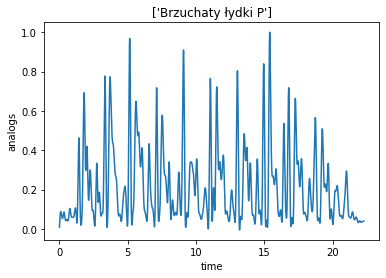

In [47]:
plt.plot(emg_p.time.values,emg_norm_value)
plt.xlabel("time")
plt.ylabel("analogs");
plt.title(muscles_names[i])


In [125]:
print(emg_processed)


[0.001, 0.01059376094083724]
